In [56]:
import os
import csv
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iSCAMS_class import iSCAMS
from iSCAMS_calibration import iSCAMS_calibrate
from astroML.plotting import hist

In [7]:
Path = r"./Contrasts/Standards/CHV_CupA/"
File = r"ADH_100nM_Cf.npy"

filename_sample = os.path.join(os.path.expanduser(Path),File)
assert os.path.exists(filename_sample)

In [17]:
Cf = np.load(filename_sample)

Conc = "100nM"
Protein = "ADH"
Buffer = "TRIS"
Nucleotide = ""

ADH = iSCAMS(Cf,Conc=Conc,Protein=Protein,
              Buffer=Buffer,Nucleotide=Nucleotide,Mass=False,
             c_range=(0.0,0.02),bin_type = "knuth")

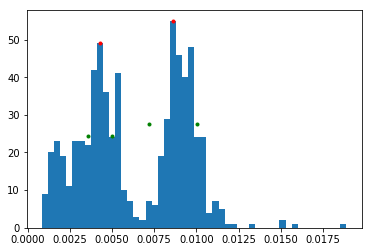

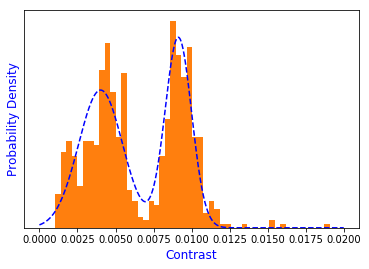

In [18]:
ADH.Auto_Gauss()
ADH.Fit_Gaussian()

In [19]:
print(ADH.popt)

[4.01986627e-03 1.48062285e+02 2.04668269e-03 9.12874876e-03
 2.04513328e+02 1.23297526e-03]


In [52]:
ADH.GaussKernel(sigma=30)

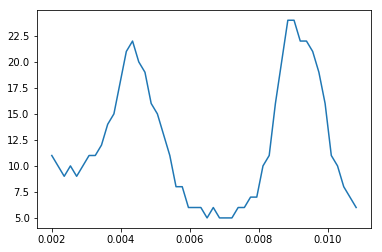

In [54]:
plt.figure()
n, bins, p = hist(ADH.contrast_smooth,bins=50,range=(0.002,0.011))
plt.clf()
plt.plot(bins[:-1],n)
plt.show()

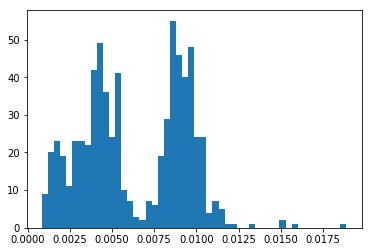

Number of Gaussians:
2
Gaussian 1
Centre:


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [60]:
ADH_cal = iSCAMS_calibrate(Cf,"ADH")
ADH.Manual_Gauss()

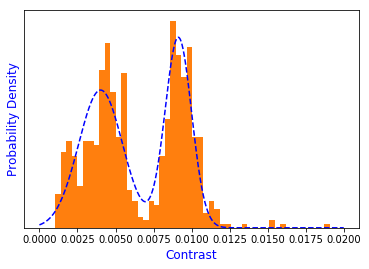

[4.01986627e-03 1.48062285e+02 2.04668269e-03 9.12874876e-03
 2.04513328e+02 1.23297526e-03]


In [59]:
ADH.Fit_Gaussian()
print(ADH.popt)